In [1]:
!pip install numpy
!pip install d2l --no-deps

In [2]:
from google.colab import files

# This will open a 'Choose Files' button in your output cell
# Choose train_helpers.py
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [3]:
import time
import torch
from torch import nn
from d2l import torch as d2l
from train_helpers import train_and_eval

In [4]:
accuracies = {}
training_times = {}
parameter_count = {}

In [5]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [6]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))

In [7]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


Average time per epoch: 410.8217 seconds
Accuracy: 0.8762
Parameter count: 128806154


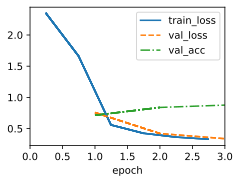

In [8]:
a, t, p = train_and_eval(VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))), "VGG-11", resize=True, epochs=3)
accuracies["VGG-11"] = a
training_times["VGG-11"] = t
parameter_count["VGG-11"] = p

In [9]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

Average time per epoch: 60.3278 seconds
Accuracy: 0.887
Parameter count: 46764746


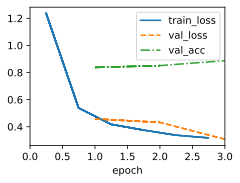

In [10]:
a,t,p = train_and_eval(AlexNet(), "AlexNet", resize=True, epochs=3)
accuracies["AlexNet"] = a
training_times["AlexNet"] = t
parameter_count["AlexNet"] = p

In [11]:
print("Comparison of VGG and AlexNet Performance")
print(f"VGG")
print(f"Accuracy: {accuracies['VGG-11']}")
print(f"Training Time: {training_times['VGG-11']}")
print(f"Parameter Count: {parameter_count['VGG-11']}")
print(f"AlexNet")
print(f"Accuracy: {accuracies['AlexNet']}")
print(f"Training Time: {training_times['AlexNet']}")
print(f"Parameter Count: {parameter_count['AlexNet']}")

Comparison of VGG and AlexNet Performance
VGG
Accuracy: 0.8762
Training Time: 1232.4651959249995
Parameter Count: 128806154
AlexNet
Accuracy: 0.887
Training Time: 180.98349401699943
Parameter Count: 46764746


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.53 GiB. GPU 0 has a total capacity of 14.74 GiB of which 398.12 MiB is free. Process 299528 has 14.35 GiB memory in use. Of the allocated memory 6.01 GiB is allocated by PyTorch, and 8.20 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

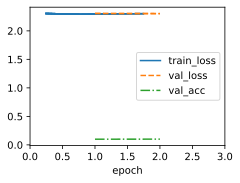

In [12]:
a,t,p= train_and_eval(VGG(arch=((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))), "VGG-16", resize=True, epochs=3)
accuracies["VGG-16"] = a
training_times["VGG-16"] = t
parameter_count["VGG-16"] = p

In [ ]:
a,t,p = train_and_eval(VGG(arch=((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))), "VGG-19", resize=True, epochs=3)
accuracies["VGG-19"] = a
training_times["VGG-19"] = t
parameter_count["VGG-19"] = p

In [ ]:
print("Summary of VGG Model Performance with Different Architectures")
print(f"VGG-11")
print(f"Accuracy: {accuracies['VGG-11']}")
print(f"Training Time: {training_times['VGG-11']}")
print(f"Parameter Count: {parameter_count['VGG-11']}")
print(f"VGG-16")
print(f"Accuracy: {accuracies['VGG-16']}")
print(f"Training Time: {training_times['VGG-16']}")
print(f"Parameter Count: {parameter_count['VGG-16']}")
print(f"VGG-19")
print(f"Accuracy: {accuracies['VGG-19']}")
print(f"Training Time: {training_times['VGG-19']}")
print(f"Parameter Count: {parameter_count['VGG-19']}")

Average time per epoch: 11.7466 seconds
Accuracy: 0.8536
Parameter count: 19331322


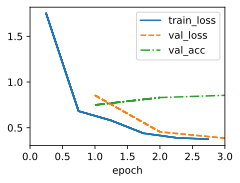

In [20]:
a, t, p = train_and_eval(VGG(arch=((2, 16), (2, 32), (4, 64))), "VGG-19-small", epochs=3)
accuracies["VGG-19-small"] = a
training_times["VGG-19-small"] = t
parameter_count["VGG-19-small"] = p

In [23]:
print("Comparison of VGG and VGG-small")
print(f"VGG")
print(f"Accuracy: {accuracies['VGG-11']}")
print(f"Training Time: {training_times['VGG-11']}")
print(f"Parameter Count: {parameter_count['VGG-11']}")
print(f"VGG-small")
print(f"Accuracy: {accuracies['VGG-19-small']}")
print(f"Training Time: {training_times['VGG-19-small']}")
print(f"Parameter Count: {parameter_count['VGG-19-small']}")

Comparison of VGG and VGG-small
VGG
Accuracy: 0.8762
Training Time: 1232.4651959249995
Parameter Count: 128806154
VGG-small
Accuracy: 0.8536
Training Time: 35.239787857999545
Parameter Count: 19331322


## Nin

In [24]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

In [25]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())

In [26]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


Average time per epoch: 75.0253 seconds
Accuracy: 0.8596
Parameter count: 1992166


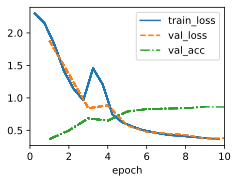

In [27]:
a,t,p = train_and_eval(NiN(), "NiN", resize=True, epochs=10)
accuracies["NiN"] = a
training_times["NiN"] = t
parameter_count["NiN"] = p

In [28]:
class NiN_MLP_end(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.Flatten(),
            nn.LazyLinear(512),
            nn.ReLU(),
            nn.LazyLinear(512),
            nn.ReLU(),
            nn.LazyLinear(num_classes))

Average time per epoch: 74.6915 seconds
Accuracy: 0.8493
Parameter count: 2388464


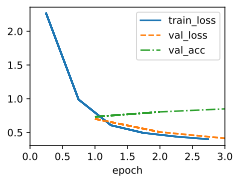

In [29]:
a,t,p= train_and_eval(NiN_MLP_end(), "NiN-MLP-end", resize=True, epochs=3)
accuracies["NiN-MLP-end"] = a
training_times["NiN-MLP-end"] = t
parameter_count["NiN-MLP-end"] = p

In [31]:
print("Comparison of VGG, NiN, and NiN with MLP at the end")
print(f"VGG")
print(f"Accuracy: {accuracies['VGG-11']}")
print(f"Training Time: {training_times['VGG-11']}")
print(f"Parameter Count: {parameter_count['VGG-11']}")
print(f"NiN")
print(f"Accuracy: {accuracies['NiN']}")
print(f"Training Time: {training_times['NiN']}")
print(f"Parameter Count: {parameter_count['NiN']}")
print(f"NiN with MLP at the end")
print(f"Accuracy: {accuracies['NiN-MLP-end']}")
print(f"Training Time: {training_times['NiN-MLP-end']}")
print(f"Parameter Count: {parameter_count['NiN-MLP-end']}")

Comparison of VGG, NiN, and NiN with MLP at the end
VGG
Accuracy: 0.8762
Training Time: 1232.4651959249995
Parameter Count: 128806154
NiN
Accuracy: 0.8596
Training Time: 750.2533349330006
Parameter Count: 1992166
NiN with MLP at the end
Accuracy: 0.8493
Training Time: 224.0743779759996
Parameter Count: 2388464


## NiN Block Changes

In [32]:
def nin_block_varheight(out_channels, kernel_size, strides, padding, x1height=2):
    x1convs = []
    for _ in range(x1height):
        x1convs.append(nn.LazyConv2d(out_channels, kernel_size=1))
        x1convs.append(nn.ReLU())
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        *x1convs)

In [33]:
class NiN_varheight(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, ninheight=2):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block_varheight(96, kernel_size=11, strides=4, padding=0, x1height=ninheight),
            nn.MaxPool2d(3, stride=2),
            nin_block_varheight(256, kernel_size=5, strides=1, padding=2, x1height=ninheight),
            nn.MaxPool2d(3, stride=2),
            nin_block_varheight(384, kernel_size=3, strides=1, padding=1, x1height=ninheight),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block_varheight(num_classes, kernel_size=3, strides=1, padding=1, x1height=ninheight),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())

Average time per epoch: 60.0823 seconds
Accuracy: 0.7836
Parameter count: 1769112


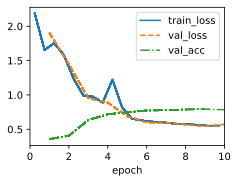

In [34]:
a,t,p = train_and_eval(NiN_varheight(ninheight=1), "NiN-varheight-1", resize=True, epochs=10)
accuracies["NiN-varheight-1"] = a
training_times["NiN-varheight-1"] = t
parameter_count["NiN-varheight-1"] = p

Average time per epoch: 88.8610 seconds
Accuracy: 0.5565
Parameter count: 2215220


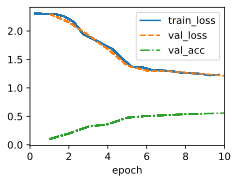

In [35]:
a,t,p = train_and_eval(NiN_varheight(ninheight=3), "NiN-varheight-3", resize=True, epochs=10)
accuracies["NiN-varheight-3"] = a
training_times["NiN-varheight-3"] = t
parameter_count["NiN-varheight-3"] = p

In [36]:
print("Summary of NiN Model Performance with Different NiN Block Changes")
print(f"Base NiN")
print(f"Accuracy: {accuracies['NiN']}")
print(f"Training Time: {training_times['NiN']}")
print(f"Parameter Count: {parameter_count['NiN']}")
print(f"NiN Block Changes: Height 1")
print(f"Accuracy: {accuracies['NiN-varheight-1']}")
print(f"Training Time: {training_times['NiN-varheight-1']}")
print(f"Parameter Count: {parameter_count['NiN-varheight-1']}")
print(f"NiN Block Changes: Height 3")
print(f"Accuracy: {accuracies['NiN-varheight-3']}")
print(f"Training Time: {training_times['NiN-varheight-3']}")

Summary of NiN Model Performance with Different NiN Block Changes
Base NiN
Accuracy: 0.8596
Training Time: 750.2533349330006
Parameter Count: 1992166
NiN Block Changes: Height 1
Accuracy: 0.7836
Training Time: 600.8225086899984
Parameter Count: 1769112
NiN Block Changes: Height 3
Accuracy: 0.5565
Training Time: 888.609935213999


In [40]:
def nin_block_3x3(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=3, padding=1), nn.ReLU())

In [41]:
class NiN_3x3(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, ninheight=2):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block_3x3(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block_3x3(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block_3x3(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block_3x3(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())

Average time per epoch: 126.4319 seconds
Accuracy: 0.1
Parameter count: 5549094


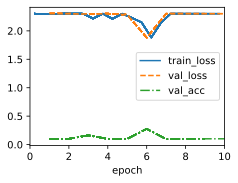

In [42]:
a,t,p = train_and_eval(NiN_3x3(), "NiN-3x3", resize=True, epochs=10)
accuracies["NiN-3x3"] = a
training_times["NiN-3x3"] = t
parameter_count["NiN-3x3"] = p

In [43]:
print("Comparison of NiN with 1x1 conv blocks and 3x3 conv blocks")
print(f"Base NiN with 1x1 conv blocks")
print(f"Accuracy: {accuracies['NiN']}")
print(f"Training Time: {training_times['NiN']}")
print(f"Parameter Count: {parameter_count['NiN']}")
print(f"NiN with 3x3 conv blocks")
print(f"Accuracy: {accuracies['NiN-3x3']}")
print(f"Training Time: {training_times['NiN-3x3']}")
print(f"Parameter Count: {parameter_count['NiN-3x3']}")

Comparison of NiN with 1x1 conv blocks and 3x3 conv blocks
Base NiN with 1x1 conv blocks
Accuracy: 0.8596
Training Time: 750.2533349330006
Parameter Count: 1992166
NiN with 3x3 conv blocks
Accuracy: 0.1
Training Time: 1264.3188565900018
Parameter Count: 5549094
